### Project Report Group 12

Great project and a great proposal layout. I also appreciate ensuring the code is reproducible. Some feedback regarding the different components:

Throughout the project, make sure you back up any claims you make (ex. heart disease is the greatest killer in the world) using trusted sources.

When conducting your exploratory analysis, I recommend avoiding standardizing your variables. Scaling/centering is necessary when you're building a KNN model with multiple variables. For exploratory analysis, your data loses interpretability once you scale/center.

For your graphs, I suggest using boxplots to compare variables in a more obvious manner. While scatter plots are prettier to look at, they can sometimes be less informative/confusing to interpret. Reach out if you have any questions about building/reading boxplots (geom_boxplot). Besides that, I appreciate the visualizations you created. While the histograms are useful, I recommend setting position = "identity" and not faceting the plot (unless you're putting one over the other). This allows you to compare the peak/center between individuals with/without heart disease. 

Again, i recommend not scaling the data at this stage. Also, in your final report, please make sure you spend more time interpreting your graphs in commentary. For example: "The distribution of ages of individuals diagnosed with heart disease is shifted to the right relative to those with no heart disease (i.e. they're older). Based on this, I believe age is a good predictor for heart disease."

In your methods, make sure you address how you plan on defining the best value of K. Great job with the rest of the methods section.

# Title: Heart Disease Prediction

# Introduction:

# Methods & Results:

In [1]:
# import needed libraries
library(tidyverse)
library(repr)
library(tidymodels)
library(gridExtra)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
# read dataset from web
heart <- read_csv("https://raw.githubusercontent.com/josephsoo/dsci_100_group_12/main/data/heart.csv")


Rows: 918 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope
dbl (7): Age, RestingBP, Cholesterol, FastingBS, MaxHR, Oldpeak, HeartDisease

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
# clean and wrangle into tidy format
# by turning HeartDisease in a factor type and 
# removing rows where cholesterol = 0
heart_clean <- mutate(heart, HeartDisease = as_factor(HeartDisease)) |> filter(Cholesterol != 0)
head(heart_clean)


Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<fct>
40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0


In [4]:
heart_split <- initial_split(heart_clean, prop = 0.75, strata = HeartDisease)  
heart_train <- training(heart_split)   
heart_test <- testing(heart_split)

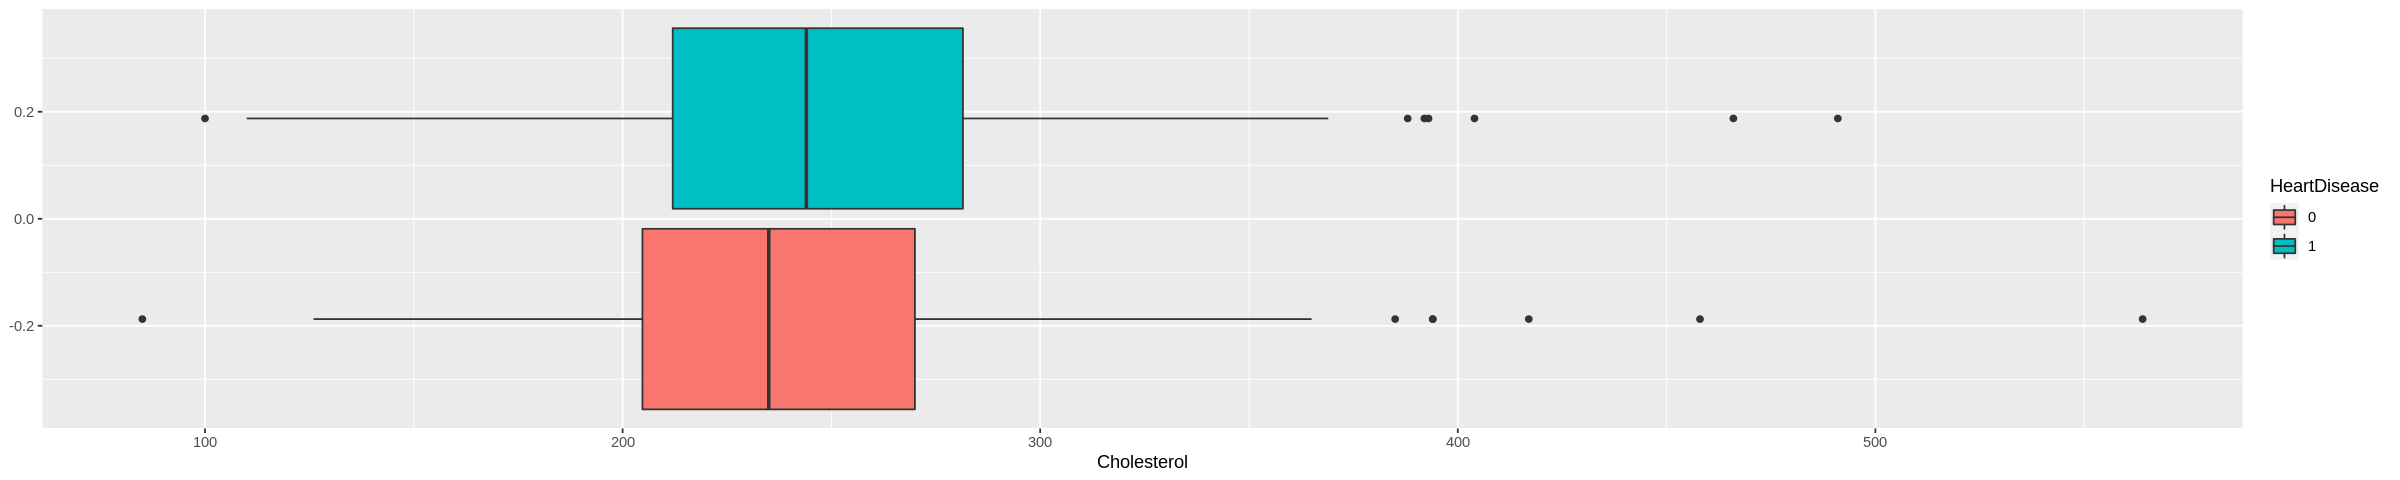

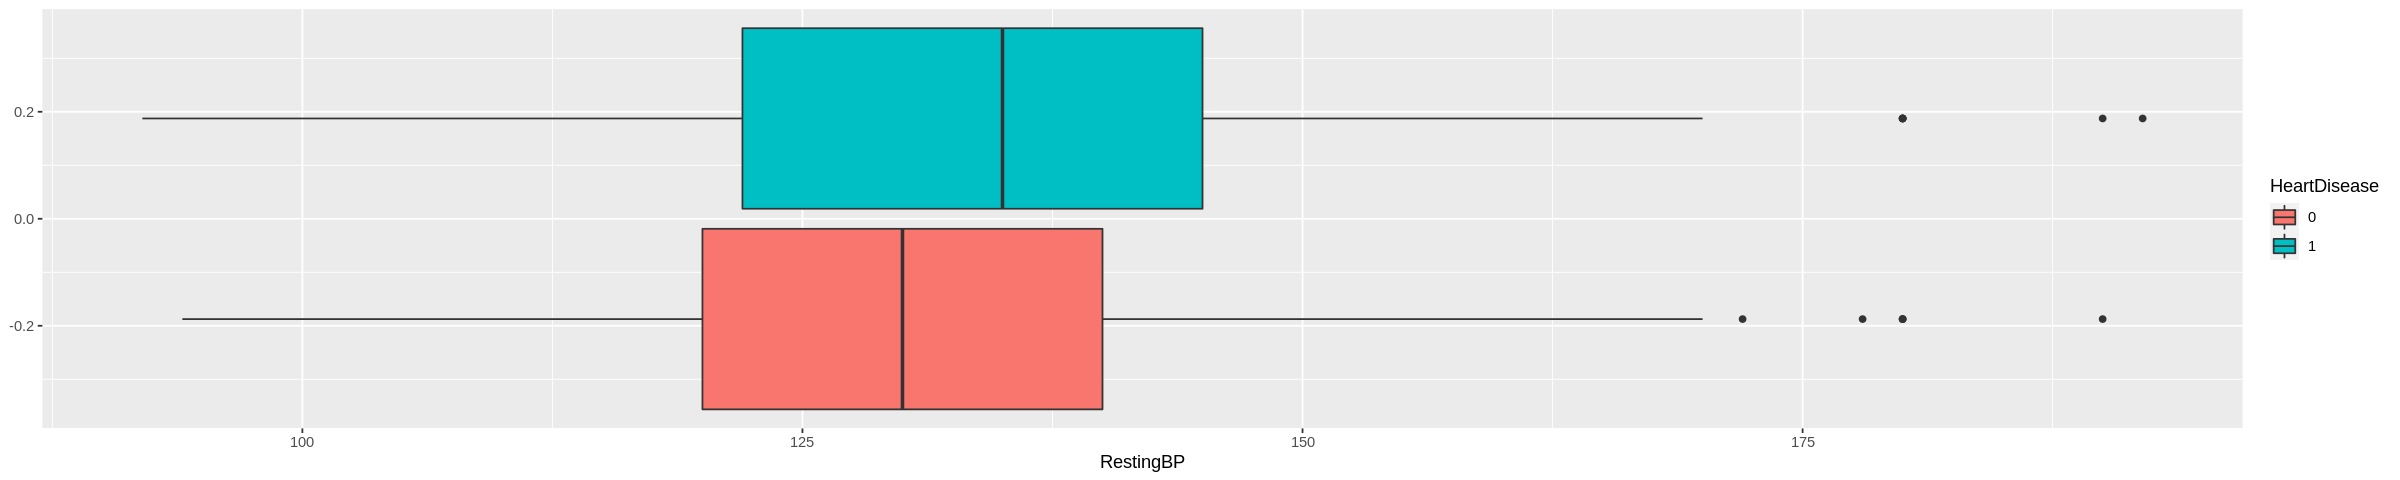

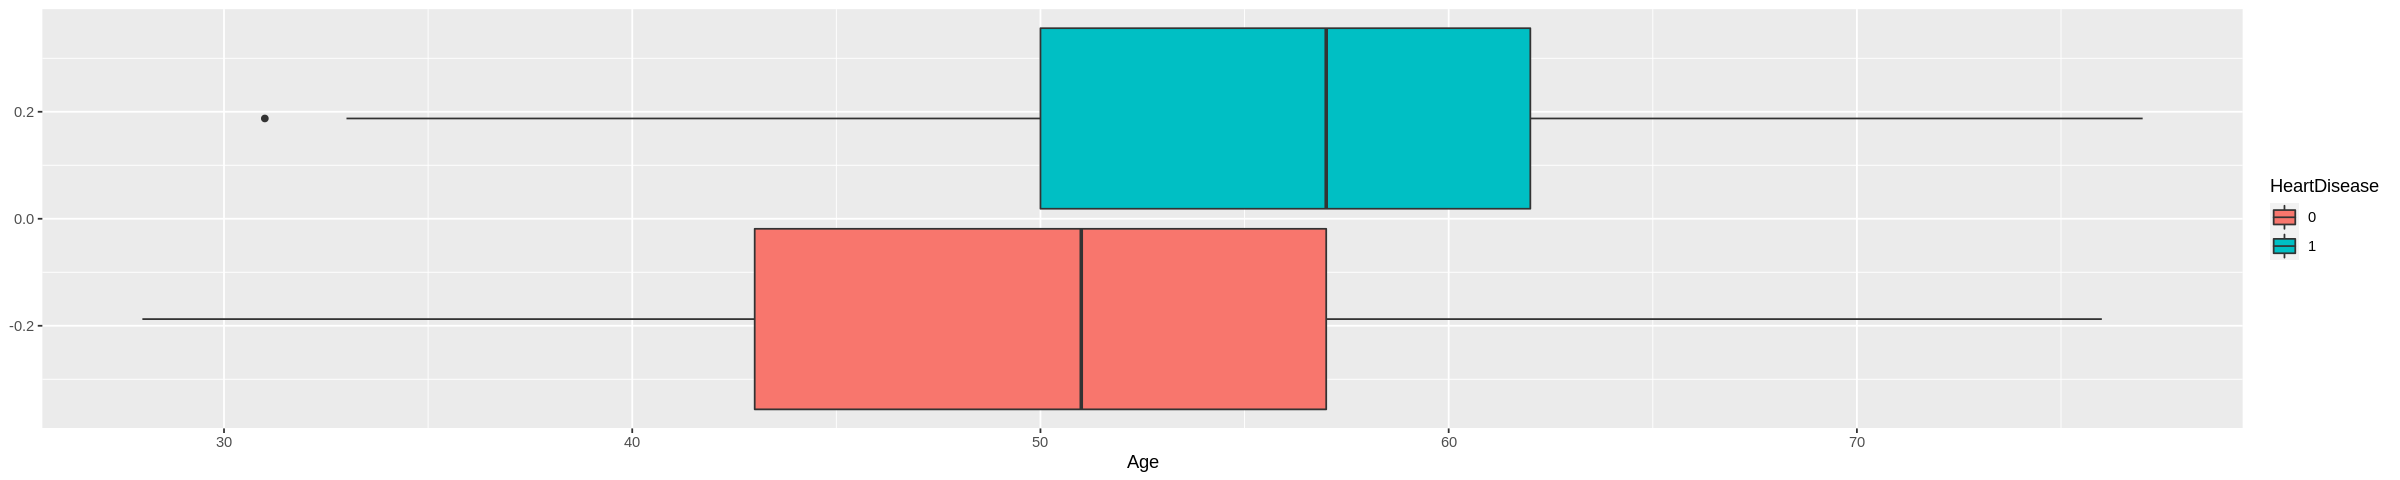

In [6]:
options(repr.plot.width = 20, repr.plot.height = 4)

cholesterol_histo <- heart_train |> ggplot(aes(x = Cholesterol, fill = HeartDisease)) +
    geom_boxplot()


bp_histo <- heart_train |> ggplot(aes(x = RestingBP, fill = HeartDisease)) +
    geom_boxplot() 

age_histo <- heart_train |> ggplot(aes(x = Age, fill = HeartDisease)) +
    geom_boxplot()


cholesterol_histo
bp_histo
age_histo


## Discussion:

## References